In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps

In [ ]:
raw_url = "https://raw.githubusercontent.com/cyrusluong1115/databootcamp/refs/heads/main/county_statistics.csv"
df = pd.read_csv(raw_url)
df.drop("Unnamed: 0",axis=1,inplace = True)
deaths_per_cap = []
cases_per_cap = []
mortality = []
# adding some extra stats that are useful
for i in range(len(df["deaths"])):
  deaths_per_cap.append(df["deaths"][i] / df["TotalPop"][i])
  cases_per_cap.append(df["cases"][i] / df["TotalPop"][i])
  mortality.append(df["deaths"][i] / df["cases"][i])
df["deaths_per_cap"] = deaths_per_cap
df["cases_per_cap"] = cases_per_cap
df["mortality"] = mortality
df.head()
trump_swing = []
# Calculate % swing between 2016-2020 election
for i in range(len(df["percentage20_Donald_Trump"])):
  # knocking out outliers- data seems funky
  swing = ((df["percentage20_Joe_Biden"][i] - df["percentage16_Hillary_Clinton"][i]) - (df["percentage20_Donald_Trump"][i] - df["percentage16_Donald_Trump"][i]))
  if swing > 0.5:
    swing = 0.5
  if swing < -0.5:
    swing = -0.5
  # if swing > 0:
  #   trump_swing.append(1)
  # else:
  #   trump_swing.append(0)
  trump_swing.append(swing)
df["trump_swing"] = trump_swing
swing_no_outliers = df.loc[(df["trump_swing"] < 0.15) & (df["trump_swing"] > -0.15)]
df.head()

<ipython-input-3-81142d2ebbaa>:11: RuntimeWarning: invalid value encountered in scalar divide
  mortality.append(df["deaths"][i] / df["cases"][i])
<ipython-input-3-81142d2ebbaa>:11: RuntimeWarning: divide by zero encountered in scalar divide
  mortality.append(df["deaths"][i] / df["cases"][i])


,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,deaths_per_cap,cases_per_cap,mortality,trump_swing
0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,...,9505.0,78.8,13.3,7.8,0.1,9.4,0.000686,0.032475,0.021118,-0.048
1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,...,24982.0,80.0,12.1,7.6,0.3,8.9,0.001629,0.050825,0.032055,-0.037
2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,...,13837.0,74.6,18.1,7.1,0.2,5.4,0.000579,0.037363,0.015485,0.022
3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,...,214984.0,78.3,15.0,6.6,0.1,4.3,0.000416,0.040106,0.010372,0.053
4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,...,3680.0,73.8,15.3,10.4,0.5,3.0,0.000139,0.030868,0.004505,-0.058


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867 entries, 0 to 4866
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county                        4867 non-null   object 
 1   state                         4867 non-null   object 
 2   percentage16_Donald_Trump     3111 non-null   float64
 3   percentage16_Hillary_Clinton  3111 non-null   float64
 4   total_votes16                 3111 non-null   float64
 5   votes16_Donald_Trump          3111 non-null   float64
 6   votes16_Hillary_Clinton       3111 non-null   float64
 7   percentage20_Donald_Trump     4490 non-null   float64
 8   percentage20_Joe_Biden        4490 non-null   float64
 9   total_votes20                 4633 non-null   float64
 10  votes20_Donald_Trump          4633 non-null   float64
 11  votes20_Joe_Biden             4633 non-null   float64
 12  lat                           3252 non-null   float64
 13  lon

In [ ]:
# State aggregation
vote_by_state = df.groupby("state")["votes20_Joe_Biden"].sum() / df.groupby("state")["total_votes20"].sum()
clinton_by_state = df.groupby("state")["votes16_Hillary_Clinton"].sum() / df.groupby("state")["total_votes16"].sum()
trump_by_state = df.groupby("state")["votes20_Donald_Trump"].sum() / df.groupby("state")["total_votes20"].sum()
trump_by_state_16 = df.groupby("state")["votes16_Donald_Trump"].sum() / df.groupby("state")["total_votes16"].sum()
vote_by_state = vote_by_state.rename("biden_state_vote")
trump_by_state = trump_by_state.rename("trump_state_vote_20")
trump_16 = trump_by_state_16.rename("trump_state_vote_16")
clinton_16 = clinton_by_state.rename("clinton_state_vote_16")
by_state = pd.concat([vote_by_state,trump_by_state,trump_16,clinton_16],axis = 1)
# by_state = pd.concat([vote_by_state,trump_by_state,trump_16],axis = 1)
by_state.dropna(inplace = True)
# by_state.sort_values(by = "biden_state_vote", ascending = False, inplace = True)
by_state
state_swings = []
for i in range(len(by_state["biden_state_vote"])):
  swing = (by_state["biden_state_vote"][i] - by_state["clinton_state_vote_16"][i]) - (by_state["trump_state_vote_20"][i] - by_state["trump_state_vote_16"][i])
  state_swings.append(swing)
by_state["state_swing"] = state_swings
# by_state.sort_values(by = "state_swing", ascending = False, inplace = True)
by_state

<ipython-input-5-b0dad590580e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  swing = (by_state["biden_state_vote"][i] - by_state["clinton_state_vote_16"][i]) - (by_state["trump_state_vote_20"][i] - by_state["trump_state_vote_16"][i])


,biden_state_vote,trump_state_vote_20,trump_state_vote_16,clinton_state_vote_16,state_swing
state,,,,,
AL,0.365156,0.620875,0.628884,0.345538,0.027627
AR,0.345676,0.625988,0.604363,0.337643,-0.013592
AZ,0.494064,0.490608,0.495031,0.453871,0.044615
CA,0.642473,0.336552,0.330641,0.615791,0.020770
CO,0.554310,0.418889,0.443593,0.472746,0.106268
CT,0.592338,0.392000,0.411610,0.544755,0.067194
DC,0.924118,0.052738,0.041221,0.928466,-0.015865
DE,0.587822,0.398014,0.419226,0.533550,0.075484
FL,0.478064,0.511715,0.490640,0.477881,-0.020892


(np.float64(-126.98373933799999),
 np.float64(-64.80167790200001),
 np.float64(24.0283850785),
 np.float64(50.002941411500004))

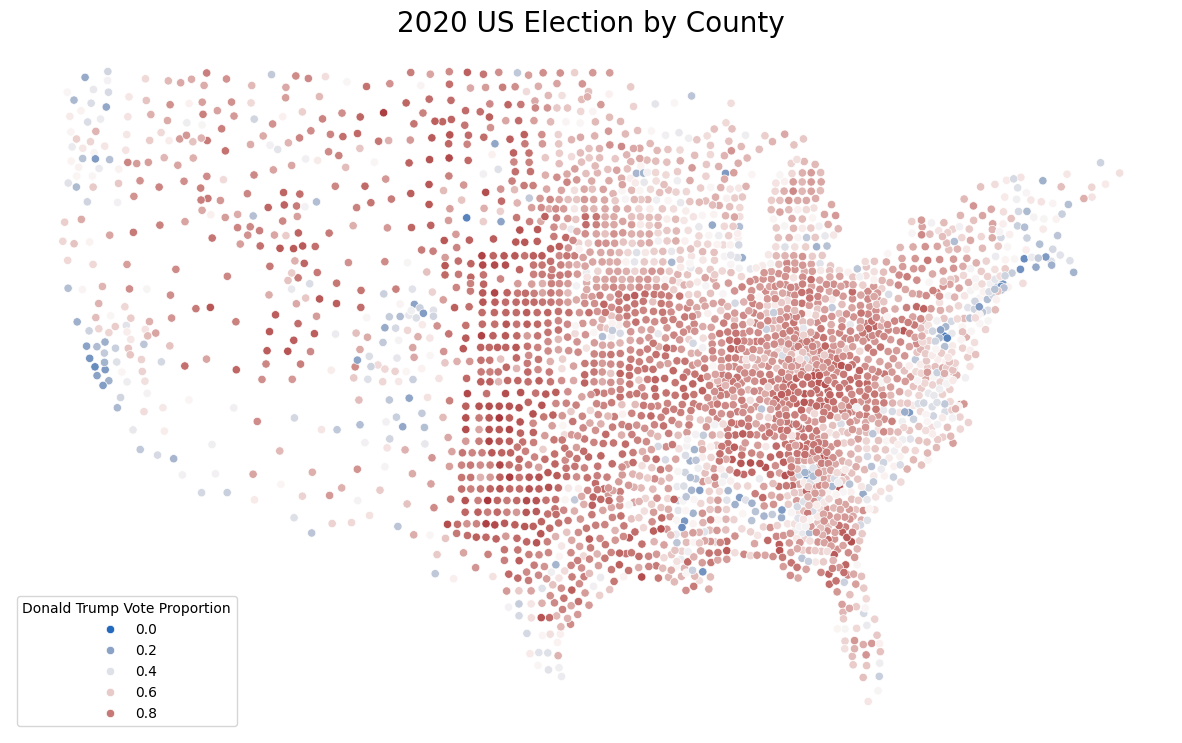

In [ ]:
continental_us = df.loc[(df["state"] != "HI") & (df["state"] != "AK")& (df["long"] != 0)]
plt.figure(figsize = (15,9))
sns.scatterplot(data = continental_us, y = "lat",x = "long", hue = "percentage20_Donald_Trump",palette = "vlag")
plt.legend(title = "Donald Trump Vote Proportion")
plt.title("2020 US Election by County",fontsize = 20)
plt.axis("off")
#Not included in write-up

(np.float64(-126.98373933799999),
 np.float64(-64.80167790200001),
 np.float64(24.0283850785),
 np.float64(50.002941411500004))

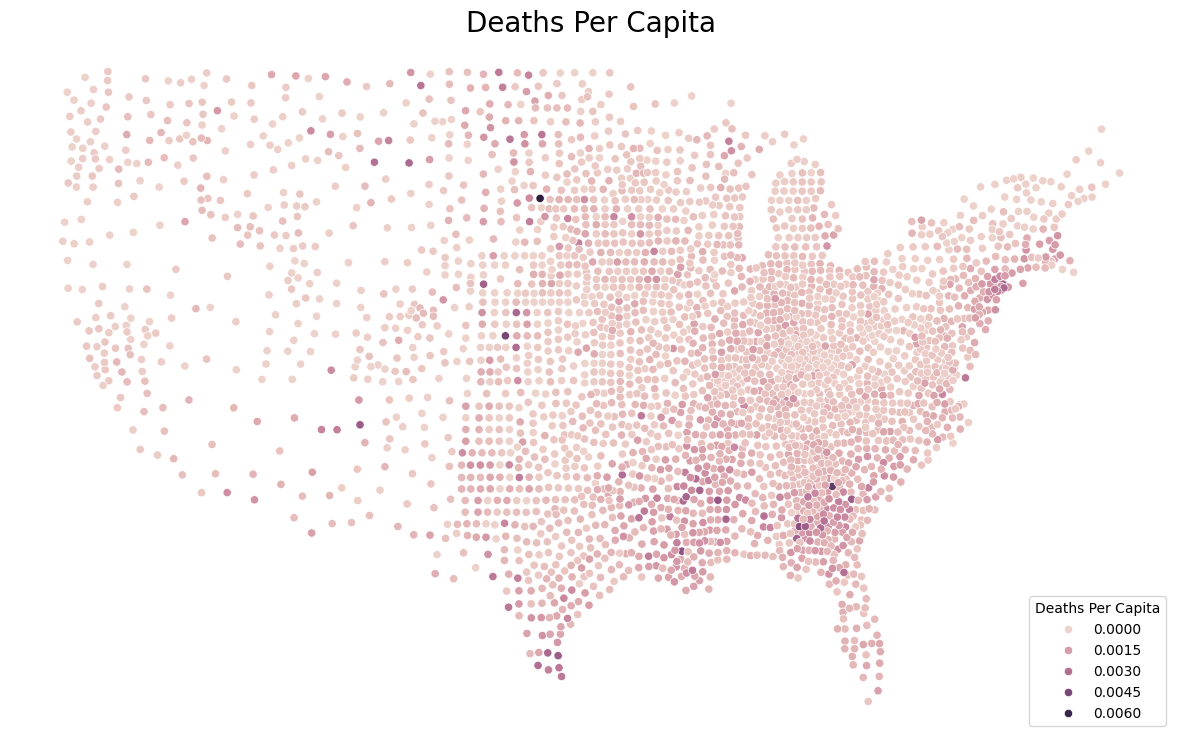

In [ ]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = continental_us, y = "lat",x = "long", hue = "deaths_per_cap")
plt.legend(title = "Deaths Per Capita", loc = "lower right")
plt.title("Deaths Per Capita",fontsize = 20)
plt.axis("off")
# plt.legend().remove()

(np.float64(-126.98373933799999),
 np.float64(-64.80167790200001),
 np.float64(24.0283850785),
 np.float64(50.002941411500004))

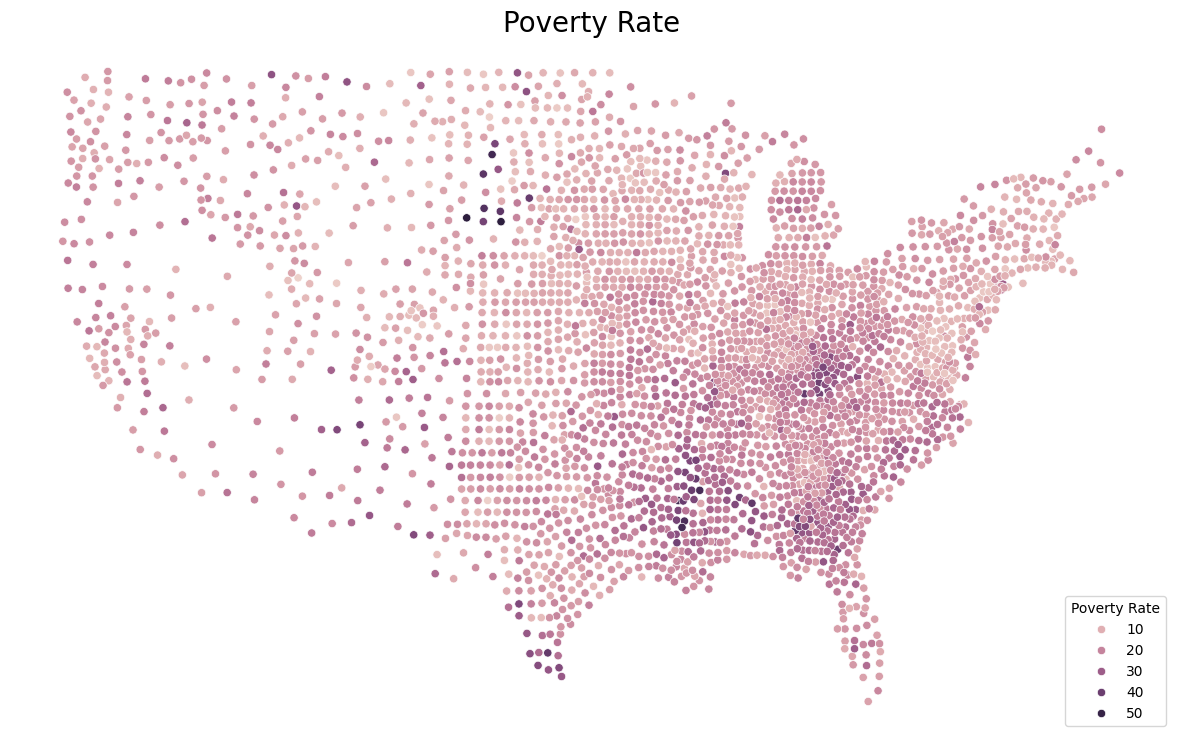

In [ ]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = continental_us, y = "lat",x = "long", hue = "Poverty")
plt.legend(title = "Poverty Rate", loc = "lower right")
plt.title("Poverty Rate",fontsize = 20)
plt.axis("off")
# plt.legend().remove()

(np.float64(-126.98373933799999),
 np.float64(-64.80167790200001),
 np.float64(24.0283850785),
 np.float64(50.002941411500004))

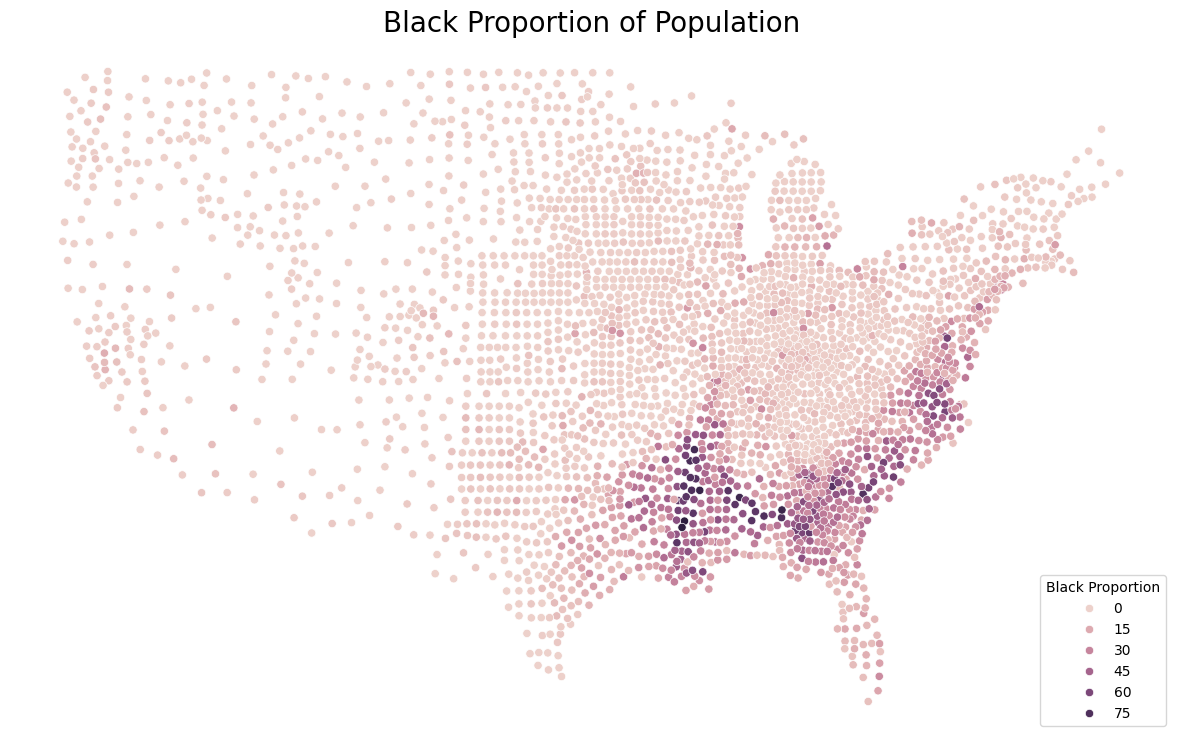

In [ ]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = continental_us, y = "lat",x = "long", hue = "Black")
plt.legend(title = "Black Proportion", loc = "lower right")
plt.title("Black Proportion of Population",fontsize = 20)
plt.axis("off")
# plt.legend().remove()

(np.float64(-126.98373933799999),
 np.float64(-64.80167790200001),
 np.float64(24.0283850785),
 np.float64(50.002941411500004))

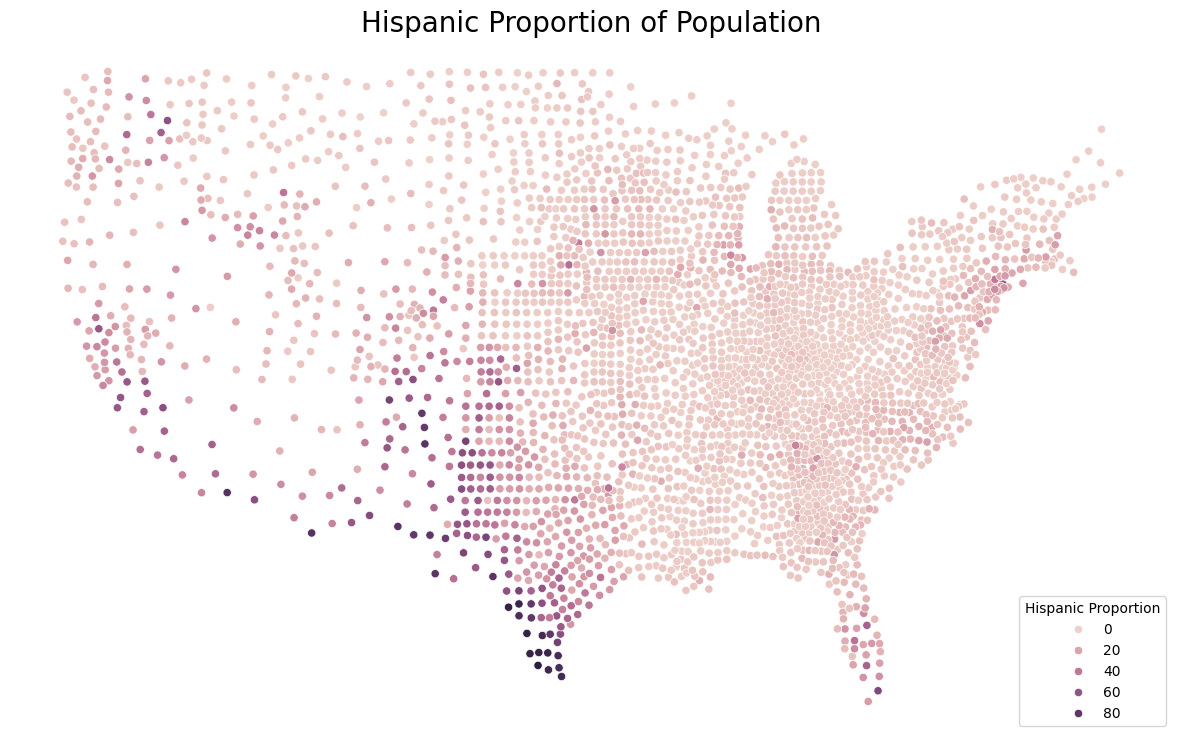

In [ ]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = continental_us, y = "lat",x = "long", hue = "Hispanic")
plt.legend(title = "Hispanic Proportion", loc = "lower right")
plt.title("Hispanic Proportion of Population",fontsize = 20)
plt.axis("off")
# plt.legend().remove()

<Axes: xlabel='deaths_per_cap'>

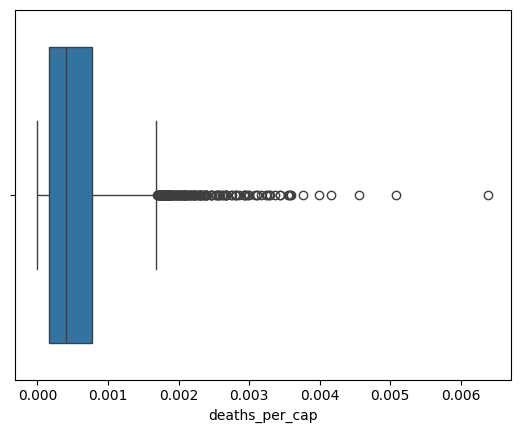

In [ ]:
sns.boxplot(data = df, x = "deaths_per_cap")
#

(np.float64(-126.98373933799999),
 np.float64(-64.80167790200001),
 np.float64(24.0283850785),
 np.float64(50.002941411500004))

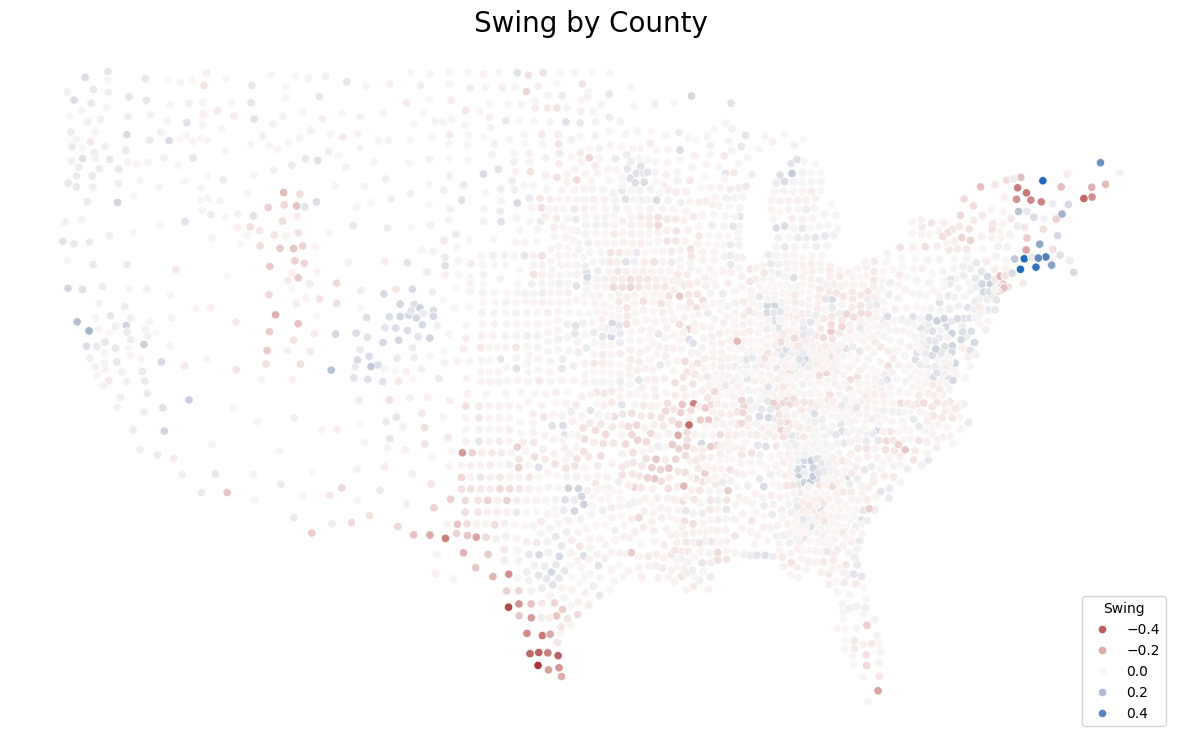

In [ ]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = continental_us, y = "lat",x = "long", hue = "trump_swing",palette = "vlag_r")
plt.legend(title = "Swing", loc = "lower right")
plt.title("Swing by County",fontsize = 20)
plt.axis("off")
# plt.legend().remove()

<Axes: >

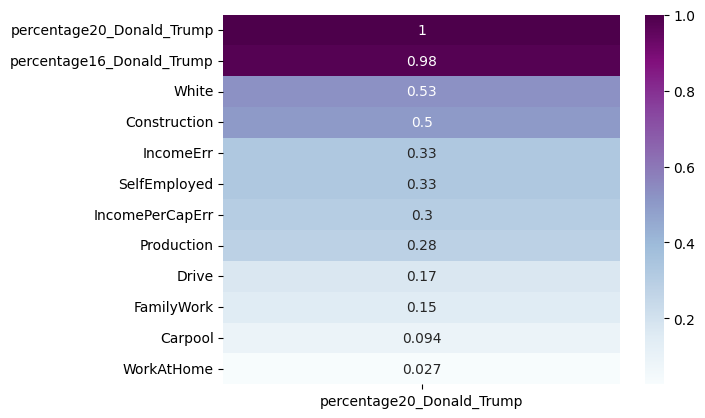

In [ ]:
corr_filter = df.corr(numeric_only = True)[["percentage20_Donald_Trump"]].sort_values(by = "percentage20_Donald_Trump", ascending = False)
corr_filter = corr_filter.loc[corr_filter["percentage20_Donald_Trump"] > 0.02]
# Isolate variables with highest correlation with target
sns.heatmap(corr_filter, annot = True, cmap = "BuPu")
#Not included in write-up

<Axes: >

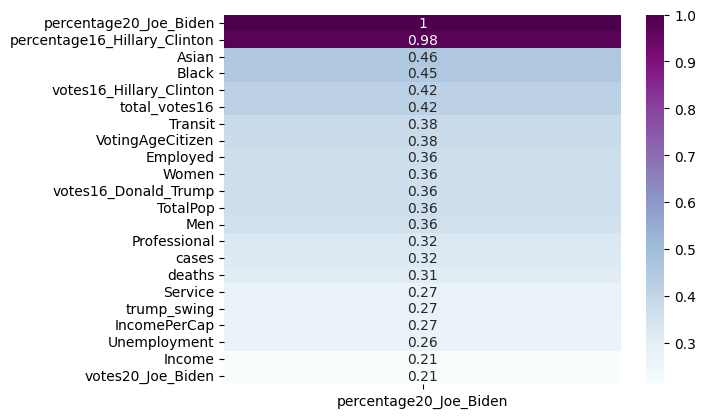

In [ ]:
corr_filter = df.corr(numeric_only = True)[["percentage20_Joe_Biden"]].sort_values(by = "percentage20_Joe_Biden", ascending = False)
corr_filter = corr_filter.loc[corr_filter["percentage20_Joe_Biden"] > 0.2]
# Isolate variables with highest correlation with target
sns.heatmap(corr_filter, annot = True, cmap = "BuPu")

<Axes: >

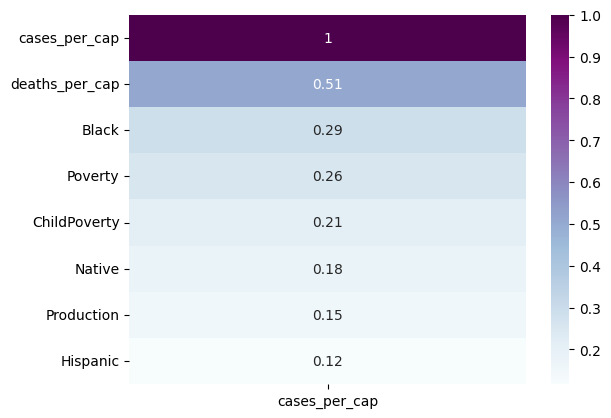

In [ ]:
corr_filter = df.corr(numeric_only = True)[["cases_per_cap"]].sort_values(by = "cases_per_cap", ascending = False)
corr_filter = corr_filter.loc[corr_filter["cases_per_cap"] > 0.1]
# Isolate variables with highest correlation with target
sns.heatmap(corr_filter, annot = True, cmap = "BuPu")

<Axes: >

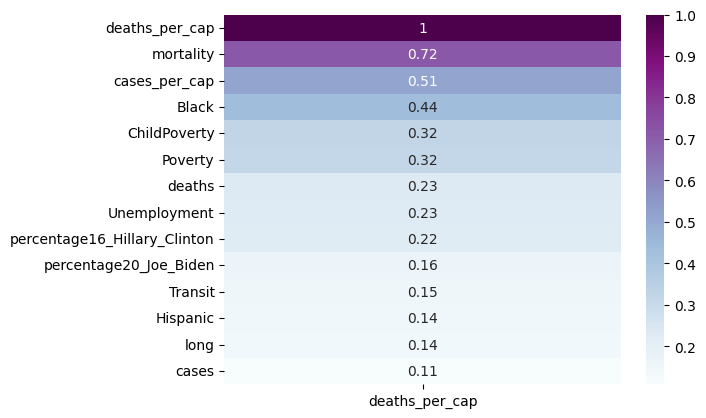

In [ ]:
corr_filter = df.corr(numeric_only = True)[["deaths_per_cap"]].sort_values(by = "deaths_per_cap", ascending = False)
corr_filter = corr_filter.loc[corr_filter["deaths_per_cap"] > 0.1]
# Isolate variables with highest correlation with target
sns.heatmap(corr_filter, annot = True, cmap = "BuPu")

<Axes: >

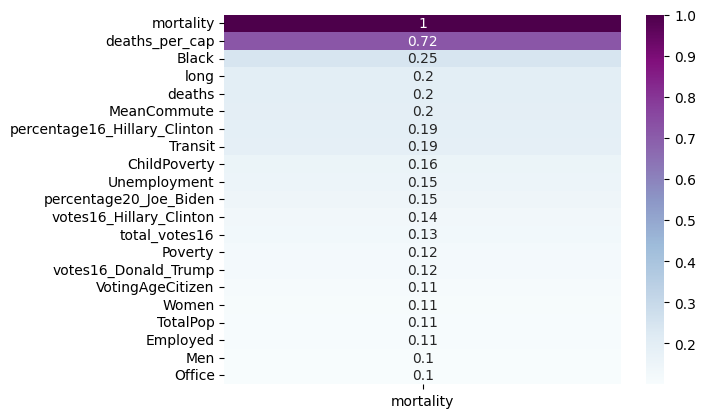

In [ ]:
corr_filter = df.corr(numeric_only = True)[["mortality"]].sort_values(by = "mortality", ascending = False)
corr_filter = corr_filter.loc[corr_filter["mortality"] > 0.1]
# Isolate variables with highest correlation with target
sns.heatmap(corr_filter, annot = True, cmap = "BuPu")

<Axes: >

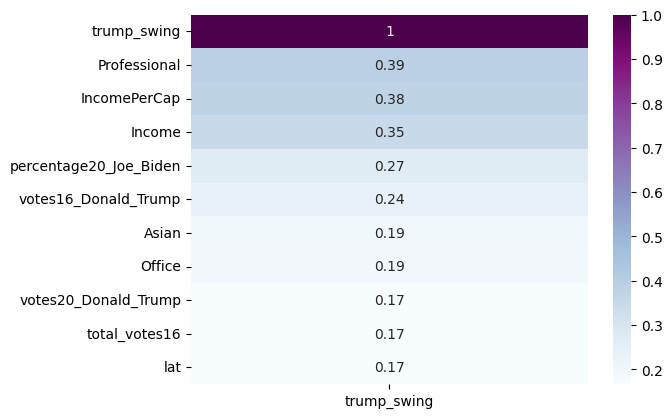

In [ ]:
corr_filter = df.corr(numeric_only = True)[["trump_swing"]].sort_values(by = "trump_swing", ascending = False)
corr_filter = corr_filter.loc[corr_filter["trump_swing"] > 0.15]
# Isolate variables with highest correlation with target
sns.heatmap(corr_filter, annot = True, cmap = "BuPu")

<Axes: >

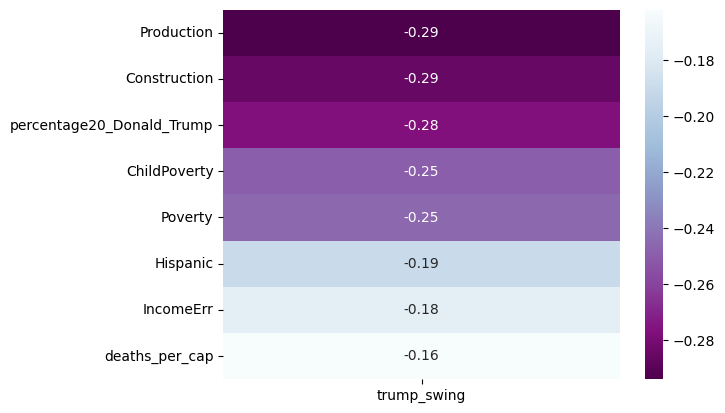

In [ ]:
corr_filter = df.corr(numeric_only = True)[["trump_swing"]].sort_values(by = "trump_swing", ascending = True)
corr_filter = corr_filter.loc[corr_filter["trump_swing"] < -0.15]
# Isolate variables with highest correlation with target
sns.heatmap(corr_filter, annot = True, cmap = "BuPu_r")


<Axes: xlabel='IncomePerCap', ylabel='Black'>

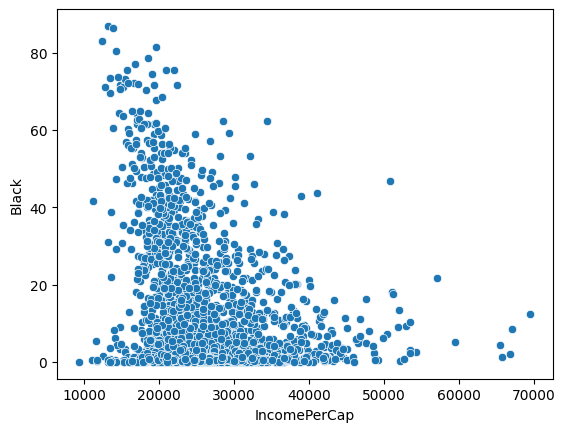

In [ ]:
 sns.scatterplot(data=df, x="IncomePerCap",y="Black") #Not included in write-up

<Axes: xlabel='Black', ylabel='trump_swing'>

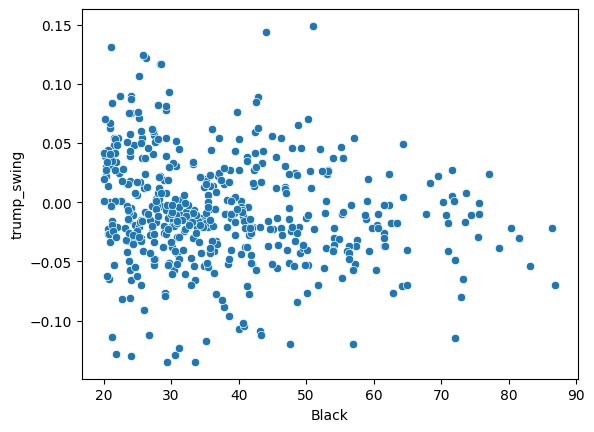

In [ ]:
sns.scatterplot(data=swing_no_outliers.loc[swing_no_outliers["Black"] > 20], x="Black",y="trump_swing") #Not included in write-up

<Axes: xlabel='IncomePerCap', ylabel='trump_swing'>

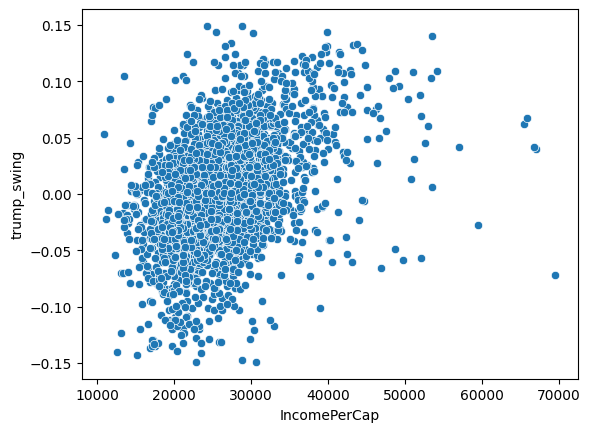

In [ ]:
sns.scatterplot(data=swing_no_outliers, x = "IncomePerCap", y = "trump_swing") #Not included in write-up

<ipython-input-23-0474a5bbd66e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = state_vote,x = "state",y = "biden_state_vote",palette = "vlag")


Text(0.5, 1.0, 'Biden Vote Proportion by State')

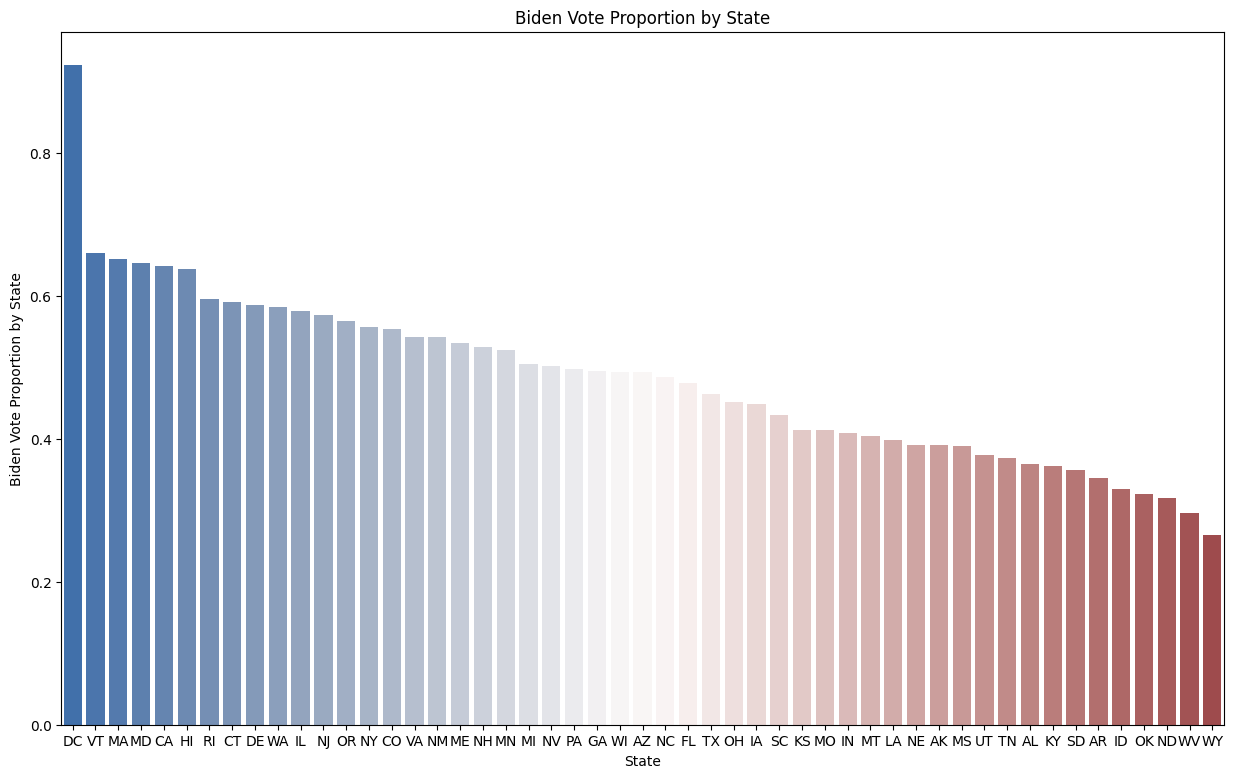

In [ ]:
plt.figure(figsize = (15,9))
state_vote = vote_by_state.rename("biden_state_vote").to_frame()
state_vote["state"] = state_vote.index
state_vote.sort_values(by = "biden_state_vote", ascending = False, inplace = True)
sns.barplot(data = state_vote,x = "state",y = "biden_state_vote",palette = "vlag")
plt.ylabel("Biden Vote Proportion by State")
plt.xlabel("State")
plt.title("Biden Vote Proportion by State")
#Not included in write-up

<ipython-input-24-35baff04150f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sort_swings,x = "state",y = "state_swing",palette = "vlag")


Text(0.5, 1.0, 'Swing by State')

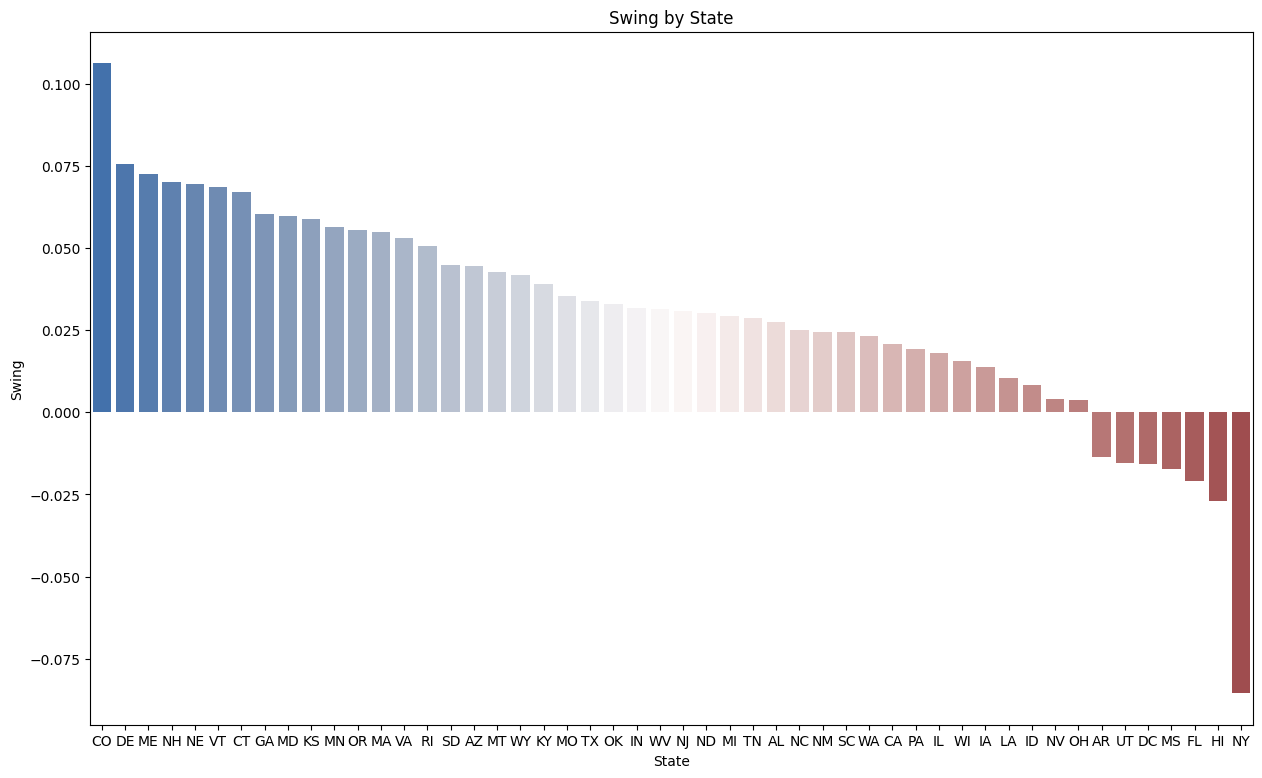

In [ ]:
plt.figure(figsize = (15,9))
sort_swings = by_state.sort_values(by = "state_swing", ascending = False)
sort_swings["state"] = sort_swings.index
sns.barplot(data = sort_swings,x = "state",y = "state_swing",palette = "vlag")
plt.ylabel("Swing")
plt.xlabel("State")
plt.title("Swing by State")